# Set up

In [1]:
%load_ext lab_black
%load_ext autoreload
%autoreload 2

In [2]:
import sys

sys.path.append("../")  # append parent dir to sys.path

In [3]:
import pandas as pd
import joblib
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from windrose import WindroseAxes
from matplotlib.projections import register_projection

In [4]:
from wind_constants import params, CODE_REGIONS, REGIONS

In [5]:
plt.rcParams.update(params)
sns.set_style("white")

In [6]:
register_projection(WindroseAxes)

In [7]:
import matplotlib.cm as cm

# Analysis

In [8]:
capacity = joblib.load("../data/selection/parc-eolien.joblib")  # Granularity = Year

In [9]:
weather = joblib.load("../data/selection/weather.joblib")  # Granularity = 3 hours

In [10]:
production = joblib.load("../data/selection/production.joblib")

In [11]:
capacity

,Année,Code INSEE région,Région,Parc installé éolien (MW)
0,2001,11,Ile-de-France,NaN
1,2001,93,Provence-Alpes-Côte d'Azur,NaN
2,2002,24,Centre-Val de Loire,NaN
3,2002,32,Hauts-de-France,11.0
4,2002,53,Bretagne,14.0
...,...,...,...,...
242,2018,76,Occitanie,1526.0
243,2019,24,Centre-Val de Loire,1255.0
244,2019,75,Nouvelle-Aquitaine,1049.0
245,2019,84,Auvergne-Rhône-Alpes,552.0


In [12]:
weather["Date"][10:40]

10    2010-01-05T16:00:00+01:00
11    2010-01-05T19:00:00+01:00
12    2010-01-05T19:00:00+01:00
13    2010-01-05T19:00:00+01:00
14    2010-01-05T22:00:00+01:00
15    2010-01-05T22:00:00+01:00
16    2010-01-05T22:00:00+01:00
17    2010-01-05T22:00:00+01:00
18    2010-01-06T01:00:00+01:00
19    2010-01-06T01:00:00+01:00
20    2010-01-06T04:00:00+01:00
21    2010-01-06T04:00:00+01:00
22    2010-01-06T04:00:00+01:00
23    2010-01-06T07:00:00+01:00
24    2010-01-06T07:00:00+01:00
25    2010-01-06T07:00:00+01:00
26    2010-01-06T07:00:00+01:00
27    2010-01-06T07:00:00+01:00
28    2010-01-06T07:00:00+01:00
29    2010-01-06T10:00:00+01:00
30    2010-01-06T10:00:00+01:00
31    2010-01-07T13:00:00+01:00
32    2010-01-07T13:00:00+01:00
33    2010-01-07T16:00:00+01:00
34    2010-01-07T16:00:00+01:00
35    2010-01-07T19:00:00+01:00
36    2010-01-07T22:00:00+01:00
37    2010-01-07T22:00:00+01:00
38    2010-01-07T22:00:00+01:00
39    2010-01-08T01:00:00+01:00
Name: Date, dtype: object

In [13]:
weather

,ID OMM station,Date,Pression au niveau mer,Variation de pression en 3 heures,Direction du vent moyen 10 mn,Vitesse du vent moyen 10 mn,Température,Pression station,Niveau barométrique,Variation de pression en 24 heures,Température du thermomètre mouillé,Rafale sur les 10 dernières minutes,Rafales sur une période,Periode de mesure de la rafale,Altitude,region (name),region (code),mois_de_l_annee
0,7558,2010-01-05T10:00:00+01:00,100280.0,-50.0,260.0,1.5,275.75,91870.0,NaN,NaN,NaN,NaN,2.1,-10.0,712,Occitanie,76.0,1
1,61976,2010-01-05T10:00:00+01:00,100990.0,NaN,NaN,NaN,305.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,NaN,NaN,1
2,7027,2010-01-05T13:00:00+01:00,100720.0,-190.0,200.0,3.6,273.65,99880.0,NaN,NaN,NaN,NaN,5.1,-10.0,67,Normandie,28.0,1
3,7110,2010-01-05T13:00:00+01:00,100750.0,-230.0,210.0,4.1,276.95,99580.0,NaN,NaN,NaN,NaN,7.2,-10.0,94,Bretagne,53.0,1
4,7591,2010-01-05T13:00:00+01:00,NaN,NaN,NaN,NaN,274.45,89870.0,85000.0,NaN,NaN,NaN,NaN,NaN,871,Provence-Alpes-Côte d'Azur,93.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1800946,78894,2018-08-09T17:00:00+02:00,NaN,NaN,110.0,2.5,NaN,101380.0,NaN,0.0,NaN,NaN,NaN,NaN,44,NaN,NaN,8
1800947,81415,2018-08-09T17:00:00+02:00,101640.0,NaN,210.0,0.8,304.35,100440.0,NaN,30.0,NaN,NaN,NaN,NaN,106,Guyane,3.0,8
1800948,7139,2018-08-09T20:00:00+02:00,NaN,NaN,260.0,4.9,291.65,NaN,NaN,NaN,NaN,7.6,7.9,-10.0,143,Normandie,28.0,8
1800949,7335,2018-08-09T20:00:00+02:00,101990.0,130.0,230.0,4.6,293.55,100590.0,NaN,690.0,NaN,6.5,7.1,-10.0,123,Nouvelle-Aquitaine,75.0,8


In [14]:
production

,Code INSEE région,Région,Nature,Date,Heure,Date - Heure,Consommation (MW),Eolien (MW),TCO Eolien (%),TCH Eolien (%)
0,24,Centre-Val de Loire,Données définitives,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN
1,52,Pays de la Loire,Données définitives,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN
2,28,Normandie,Données définitives,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN
3,27,Bourgogne-Franche-Comté,Données définitives,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN
4,32,Hauts-de-France,Données définitives,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1594939,52,Pays de la Loire,Données consolidées,2020-07-31,23:30,2020-07-31T23:30:00+02:00,2710.0,94.0,3.47,9.08
1594940,27,Bourgogne-Franche-Comté,Données consolidées,2020-07-31,23:30,2020-07-31T23:30:00+02:00,1923.0,466.0,24.23,55.48
1594941,28,Normandie,Données consolidées,2020-07-31,23:30,2020-07-31T23:30:00+02:00,2547.0,74.0,2.91,8.74
1594942,53,Bretagne,Données consolidées,2020-07-31,23:30,2020-07-31T23:30:00+02:00,2236.0,48.0,2.15,4.55


## Linear Interpolation Capacity

In [15]:
date_range_capacity = pd.date_range(
    start="2001-01-01 00:00:00",
    end="2020-01-01-00:00:00",
    freq="30T",
    tz="Europe/Paris",
)

In [16]:
data_capacity = pd.DataFrame(index=date_range_capacity)

In [17]:
yearly_capacity = capacity.groupby(by="Année").sum()

In [18]:
yearly_capacity.index = pd.date_range(
    start="2002-01-01 00:00:00",
    end="2020-01-01 00:00:00",
    freq="YS",
    tz="Europe/Paris",
)

In [19]:
data_capacity["Capacity"] = yearly_capacity["Parc installé éolien (MW)"]

In [20]:
data_capacity = data_capacity.interpolate("linear")

In [21]:
data_capacity

,Capacity
2001-01-01 00:00:00+01:00,NaN
2001-01-01 00:30:00+01:00,NaN
2001-01-01 01:00:00+01:00,NaN
2001-01-01 01:30:00+01:00,NaN
2001-01-01 02:00:00+01:00,NaN
...,...
2019-12-31 22:00:00+01:00,16492.689498
2019-12-31 22:30:00+01:00,16492.767123
2019-12-31 23:00:00+01:00,16492.844749
2019-12-31 23:30:00+01:00,16492.922374


Text(0, 0.5, 'Capacity (MW)')

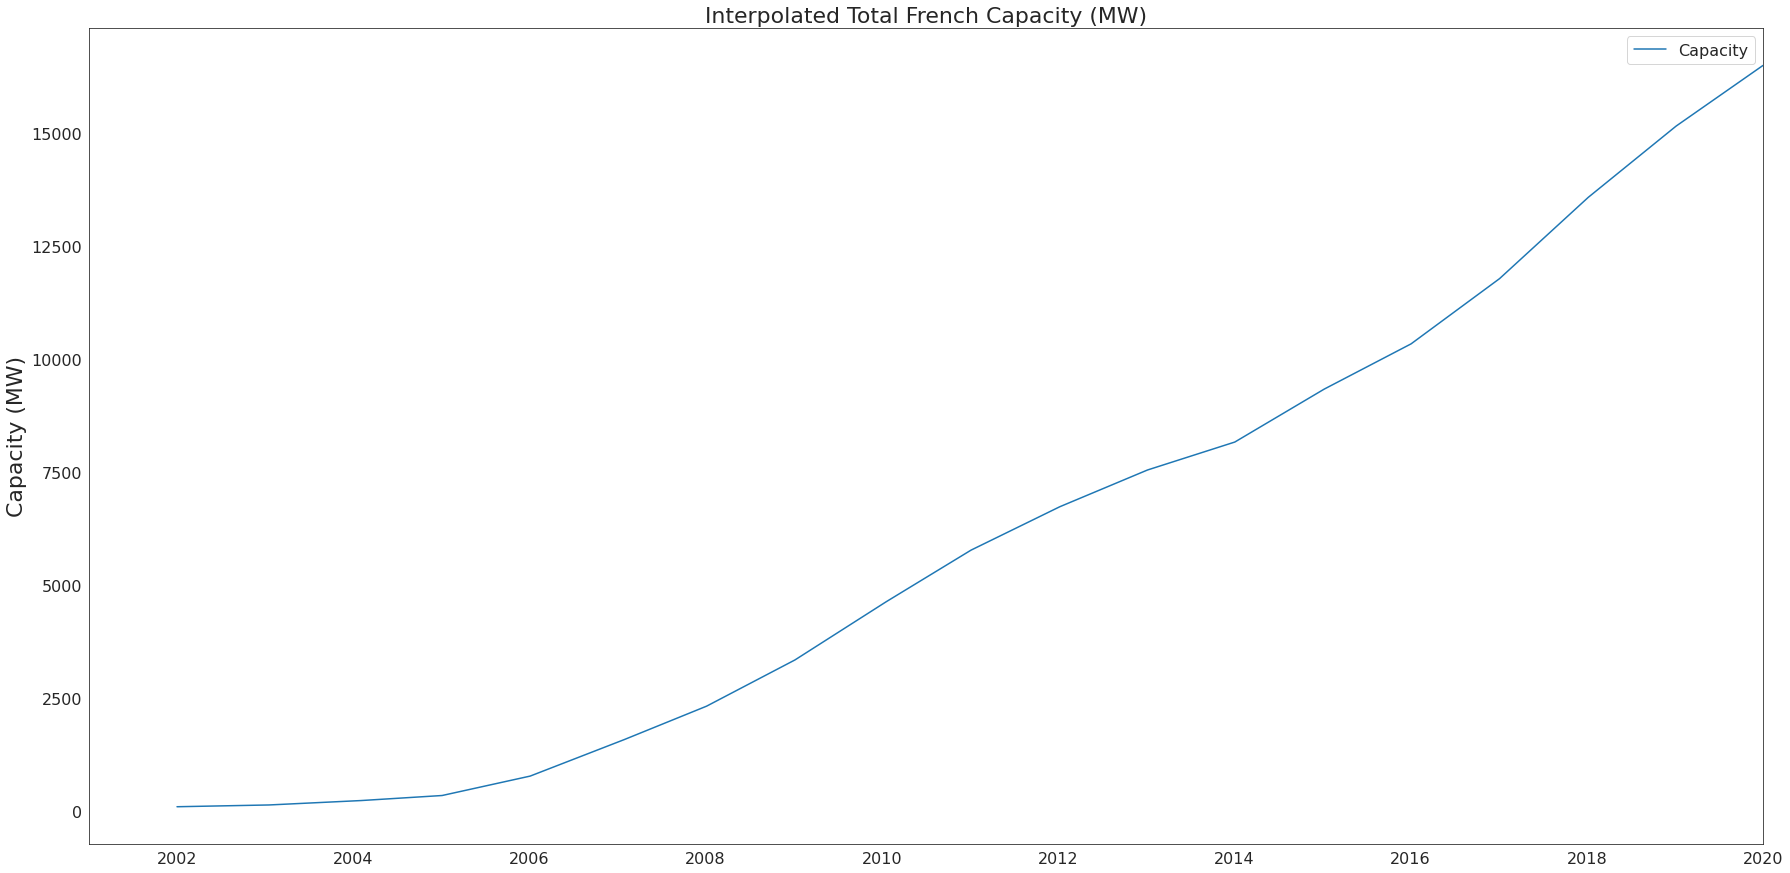

In [22]:
data_capacity.plot()
plt.title("Interpolated Total French Capacity (MW)")
plt.ylabel("Capacity (MW)")

# Load Curves per Regions

# Production Aggregation

In [23]:
production

,Code INSEE région,Région,Nature,Date,Heure,Date - Heure,Consommation (MW),Eolien (MW),TCO Eolien (%),TCH Eolien (%)
0,24,Centre-Val de Loire,Données définitives,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN
1,52,Pays de la Loire,Données définitives,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN
2,28,Normandie,Données définitives,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN
3,27,Bourgogne-Franche-Comté,Données définitives,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN
4,32,Hauts-de-France,Données définitives,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1594939,52,Pays de la Loire,Données consolidées,2020-07-31,23:30,2020-07-31T23:30:00+02:00,2710.0,94.0,3.47,9.08
1594940,27,Bourgogne-Franche-Comté,Données consolidées,2020-07-31,23:30,2020-07-31T23:30:00+02:00,1923.0,466.0,24.23,55.48
1594941,28,Normandie,Données consolidées,2020-07-31,23:30,2020-07-31T23:30:00+02:00,2547.0,74.0,2.91,8.74
1594942,53,Bretagne,Données consolidées,2020-07-31,23:30,2020-07-31T23:30:00+02:00,2236.0,48.0,2.15,4.55


In [24]:
data_production = production.groupby(by="Date - Heure").sum()

In [25]:
data_production.index = pd.to_datetime(data_production.index)

In [26]:
data_production.index

Index([2013-01-01 00:00:00+01:00, 2013-01-01 00:30:00+01:00,
       2013-01-01 01:00:00+01:00, 2013-01-01 01:30:00+01:00,
       2013-01-01 02:00:00+01:00, 2013-01-01 02:30:00+01:00,
       2013-01-01 03:00:00+01:00, 2013-01-01 03:30:00+01:00,
       2013-01-01 04:00:00+01:00, 2013-01-01 04:30:00+01:00,
       ...
       2020-07-31 19:00:00+02:00, 2020-07-31 19:30:00+02:00,
       2020-07-31 20:00:00+02:00, 2020-07-31 20:30:00+02:00,
       2020-07-31 21:00:00+02:00, 2020-07-31 21:30:00+02:00,
       2020-07-31 22:00:00+02:00, 2020-07-31 22:30:00+02:00,
       2020-07-31 23:00:00+02:00, 2020-07-31 23:30:00+02:00],
      dtype='object', name='Date - Heure', length=132896)

In [27]:
data_production = data_production["Eolien (MW)"]

In [28]:
data_production.index

Index([2013-01-01 00:00:00+01:00, 2013-01-01 00:30:00+01:00,
       2013-01-01 01:00:00+01:00, 2013-01-01 01:30:00+01:00,
       2013-01-01 02:00:00+01:00, 2013-01-01 02:30:00+01:00,
       2013-01-01 03:00:00+01:00, 2013-01-01 03:30:00+01:00,
       2013-01-01 04:00:00+01:00, 2013-01-01 04:30:00+01:00,
       ...
       2020-07-31 19:00:00+02:00, 2020-07-31 19:30:00+02:00,
       2020-07-31 20:00:00+02:00, 2020-07-31 20:30:00+02:00,
       2020-07-31 21:00:00+02:00, 2020-07-31 21:30:00+02:00,
       2020-07-31 22:00:00+02:00, 2020-07-31 22:30:00+02:00,
       2020-07-31 23:00:00+02:00, 2020-07-31 23:30:00+02:00],
      dtype='object', name='Date - Heure', length=132896)

In [29]:
data = pd.concat(objs=[data_production, data_capacity], axis="columns")

Text(0.5, 1.0, 'Capacity and Production')

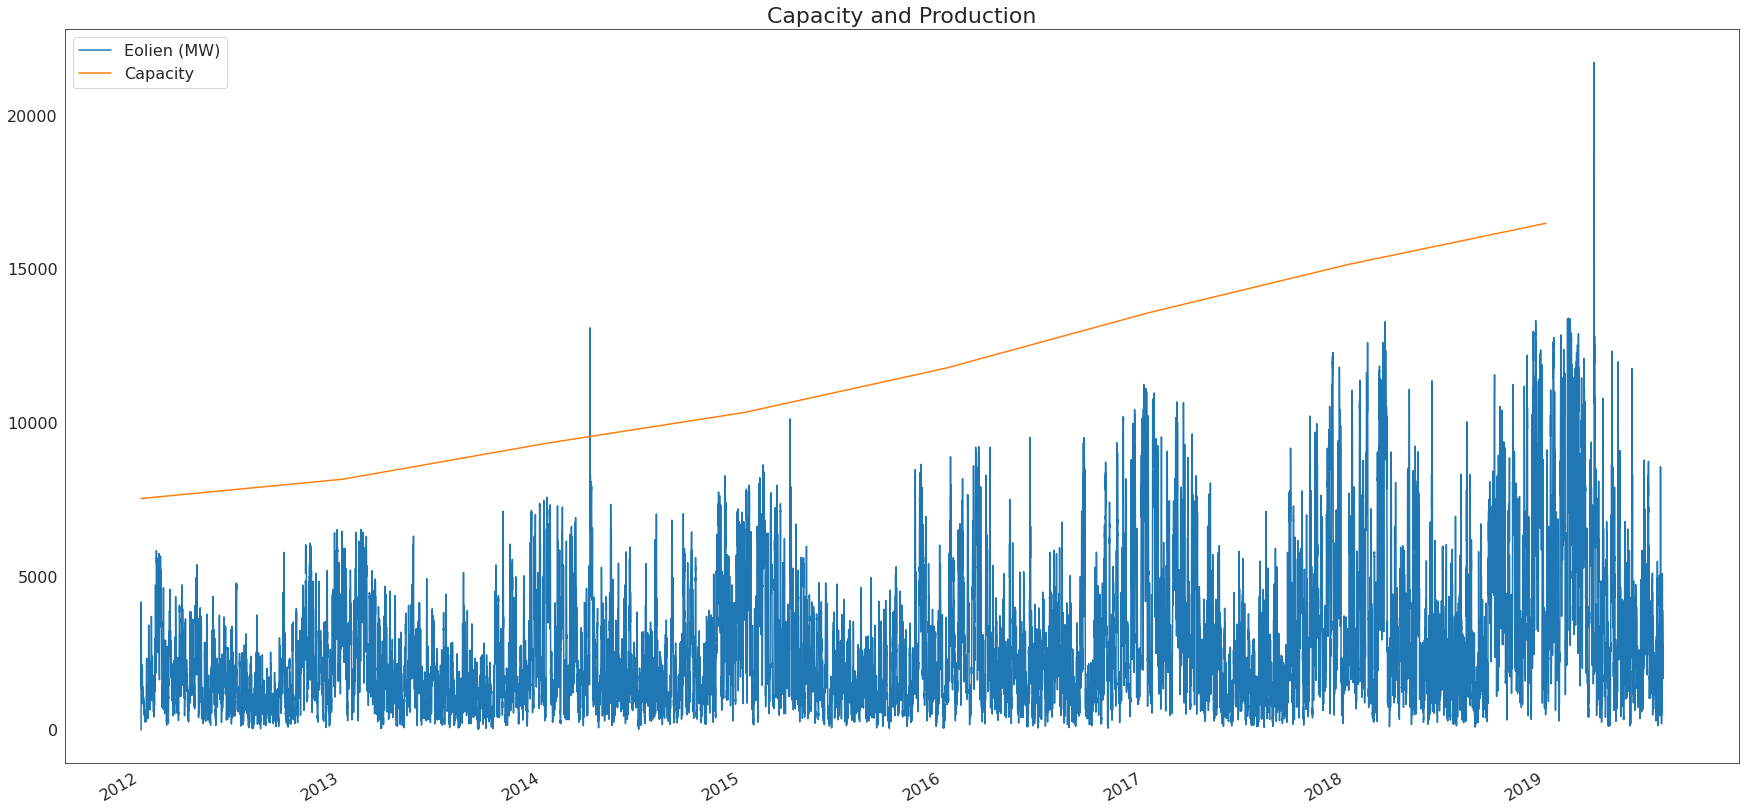

In [30]:
data.truncate(before="2013-01-01 00:00:00 +2").plot()
plt.title("Capacity and Production")

Text(0.5, 1.0, 'Relative production [-]')

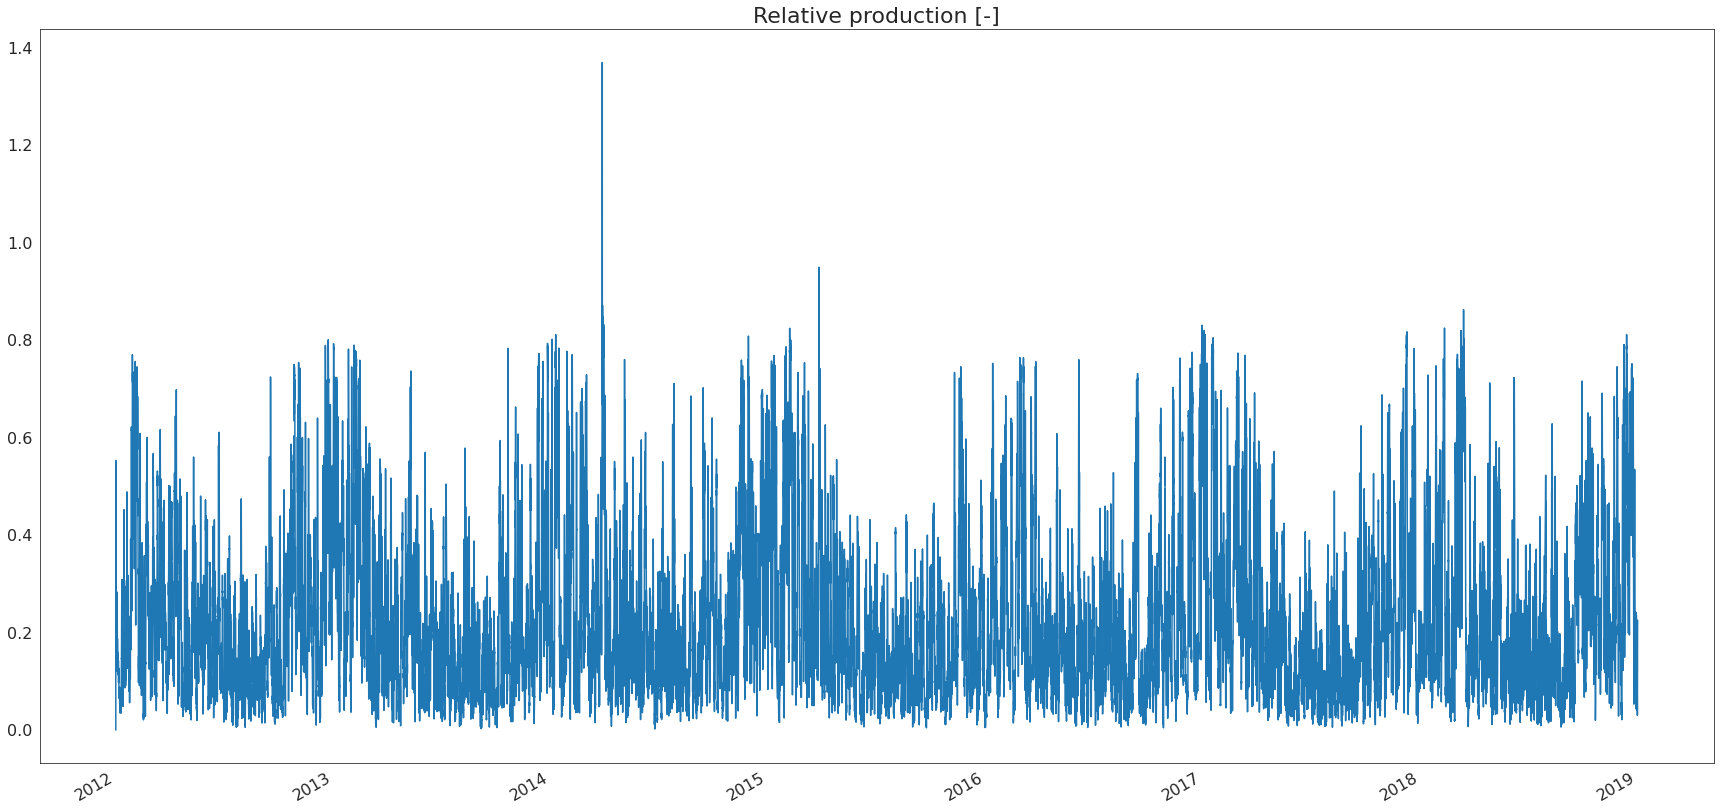

In [31]:
(data["Eolien (MW)"] / data["Capacity"]).plot()
plt.title("Relative production [-]")

In [32]:
weather

,ID OMM station,Date,Pression au niveau mer,Variation de pression en 3 heures,Direction du vent moyen 10 mn,Vitesse du vent moyen 10 mn,Température,Pression station,Niveau barométrique,Variation de pression en 24 heures,Température du thermomètre mouillé,Rafale sur les 10 dernières minutes,Rafales sur une période,Periode de mesure de la rafale,Altitude,region (name),region (code),mois_de_l_annee
0,7558,2010-01-05T10:00:00+01:00,100280.0,-50.0,260.0,1.5,275.75,91870.0,NaN,NaN,NaN,NaN,2.1,-10.0,712,Occitanie,76.0,1
1,61976,2010-01-05T10:00:00+01:00,100990.0,NaN,NaN,NaN,305.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,NaN,NaN,1
2,7027,2010-01-05T13:00:00+01:00,100720.0,-190.0,200.0,3.6,273.65,99880.0,NaN,NaN,NaN,NaN,5.1,-10.0,67,Normandie,28.0,1
3,7110,2010-01-05T13:00:00+01:00,100750.0,-230.0,210.0,4.1,276.95,99580.0,NaN,NaN,NaN,NaN,7.2,-10.0,94,Bretagne,53.0,1
4,7591,2010-01-05T13:00:00+01:00,NaN,NaN,NaN,NaN,274.45,89870.0,85000.0,NaN,NaN,NaN,NaN,NaN,871,Provence-Alpes-Côte d'Azur,93.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1800946,78894,2018-08-09T17:00:00+02:00,NaN,NaN,110.0,2.5,NaN,101380.0,NaN,0.0,NaN,NaN,NaN,NaN,44,NaN,NaN,8
1800947,81415,2018-08-09T17:00:00+02:00,101640.0,NaN,210.0,0.8,304.35,100440.0,NaN,30.0,NaN,NaN,NaN,NaN,106,Guyane,3.0,8
1800948,7139,2018-08-09T20:00:00+02:00,NaN,NaN,260.0,4.9,291.65,NaN,NaN,NaN,NaN,7.6,7.9,-10.0,143,Normandie,28.0,8
1800949,7335,2018-08-09T20:00:00+02:00,101990.0,130.0,230.0,4.6,293.55,100590.0,NaN,690.0,NaN,6.5,7.1,-10.0,123,Nouvelle-Aquitaine,75.0,8


In [33]:
data_weather = (
    weather[weather["Vitesse du vent moyen 10 mn"] > 0].groupby("Date").mean()
)

In [34]:
data_weather.index = pd.to_datetime(data_weather.index)

In [35]:
data_weather.columns.tolist()

['ID OMM station',
 'Pression au niveau mer',
 'Variation de pression en 3 heures',
 'Direction du vent moyen 10 mn',
 'Vitesse du vent moyen 10 mn',
 'Température',
 'Pression station',
 'Niveau barométrique',
 'Variation de pression en 24 heures',
 'Température du thermomètre mouillé',
 'Rafale sur les 10 dernières minutes',
 'Rafales sur une période',
 'Periode de mesure de la rafale',
 'Altitude',
 'region (code)',
 'mois_de_l_annee']

In [36]:
ws = data_weather["Vitesse du vent moyen 10 mn"]
wd = data_weather["Direction du vent moyen 10 mn"]

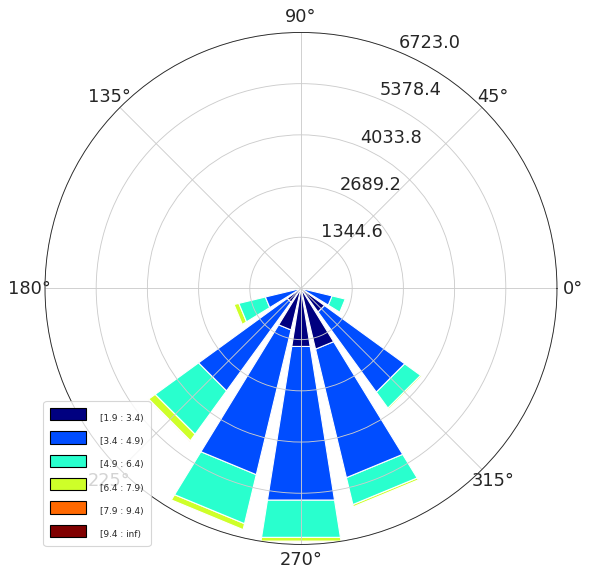

In [37]:
ax = WindroseAxes.from_ax()
ax.bar(wd, ws)
ax.set_legend()

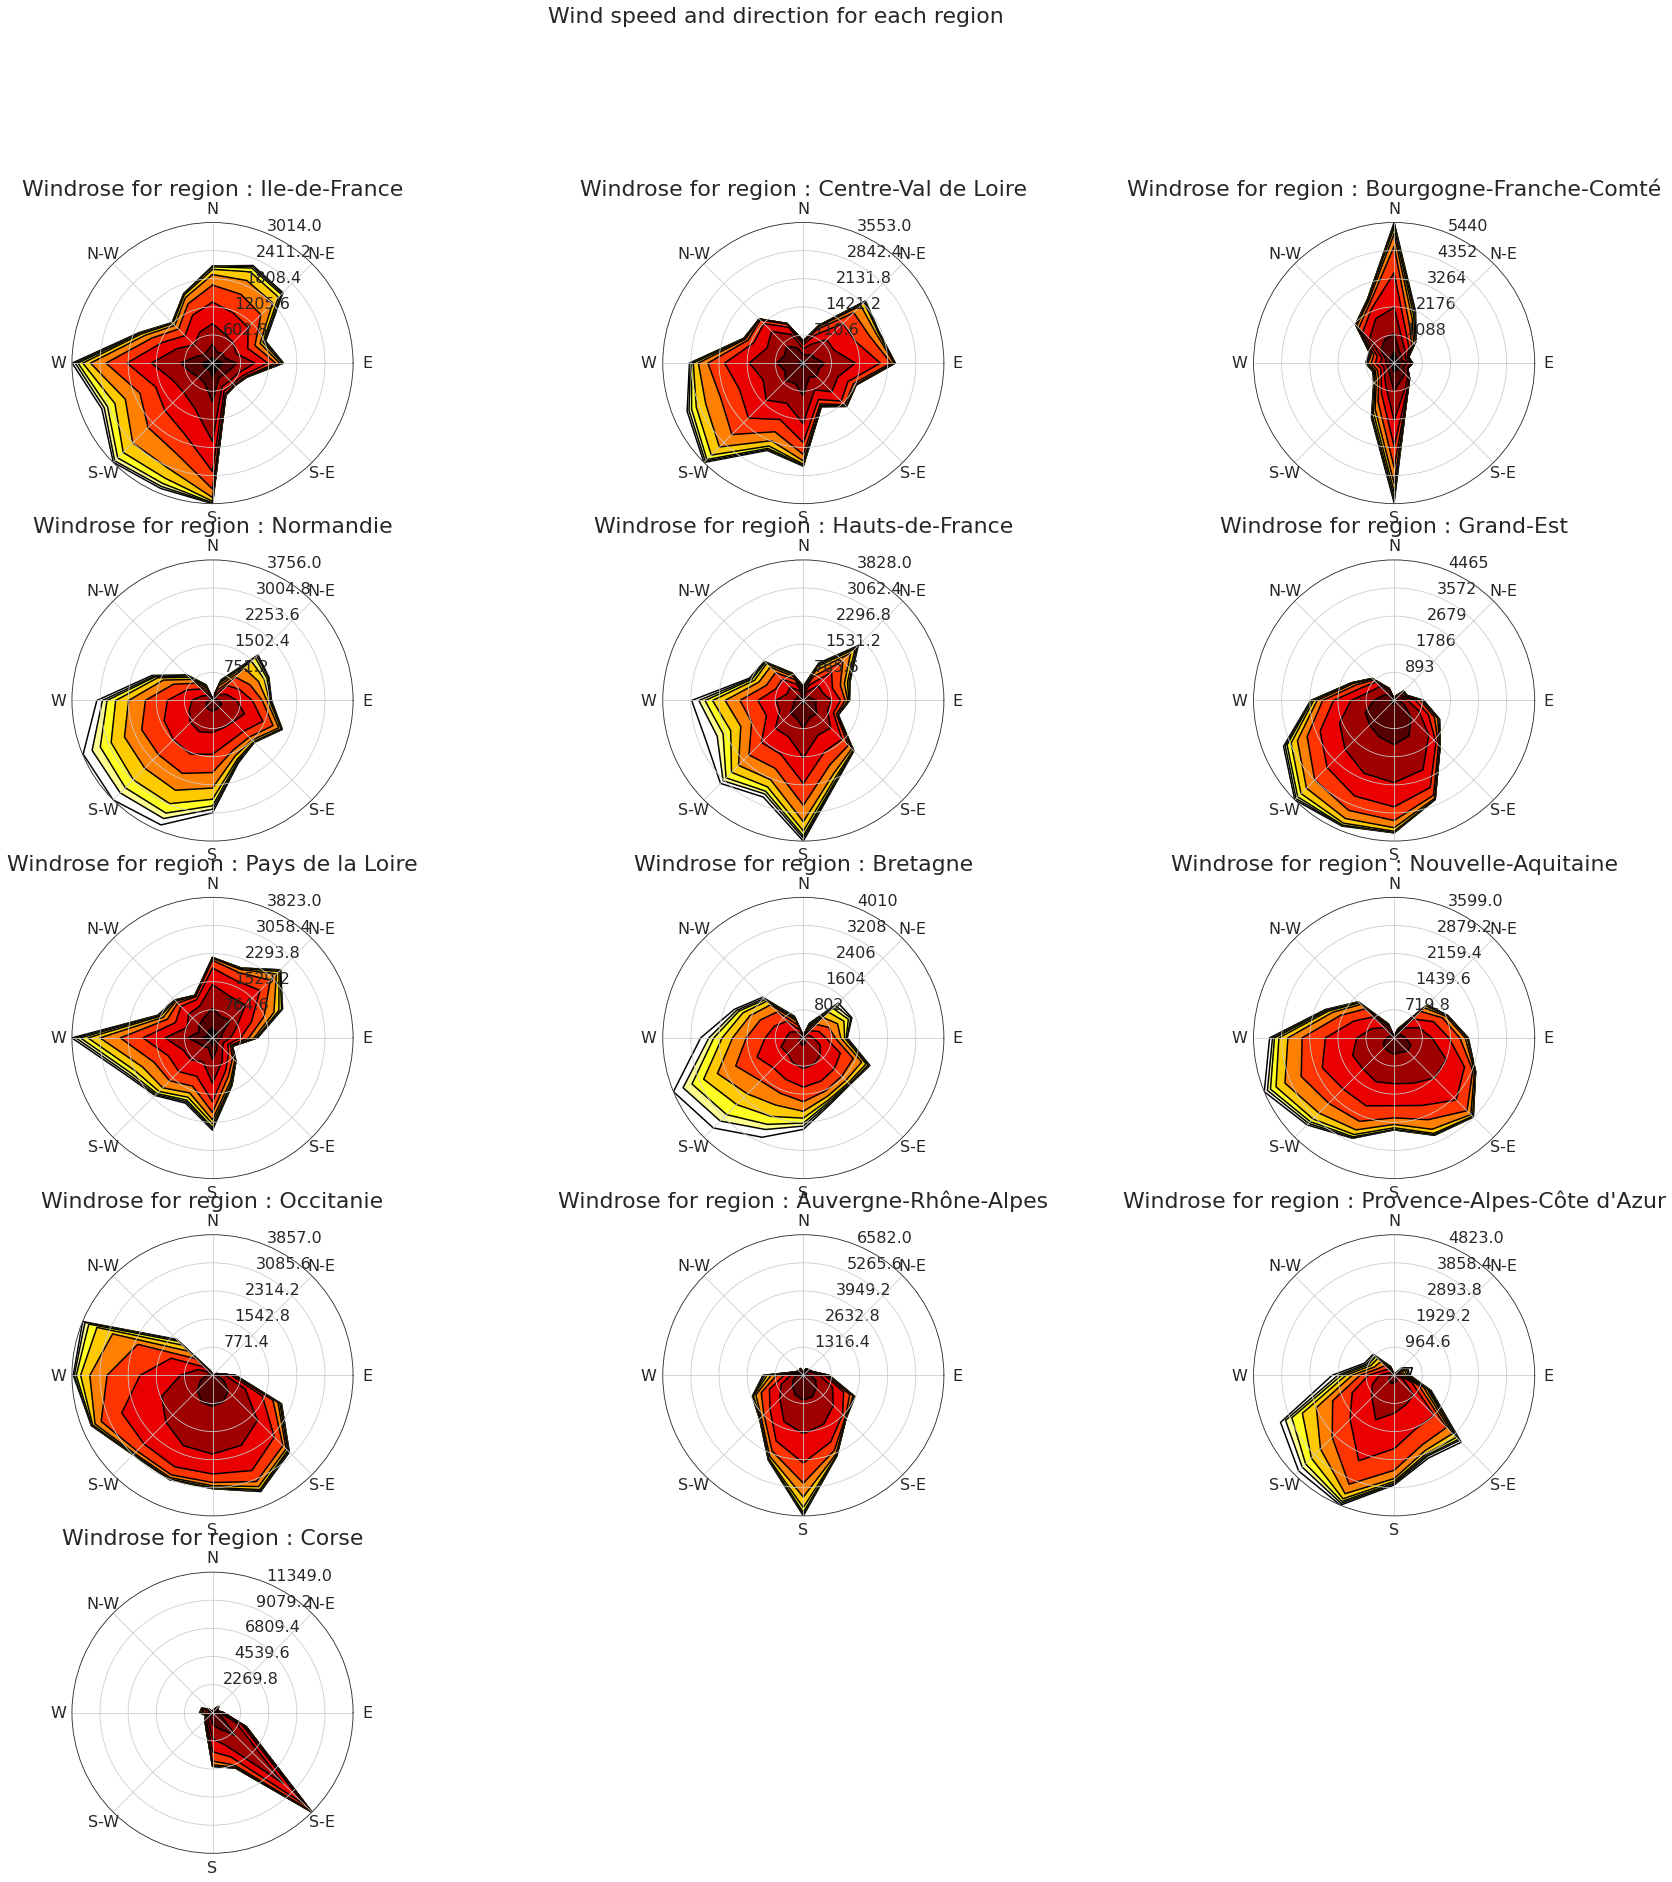

In [39]:
nrows, ncols = 5, 3
fig = plt.figure(figsize=(30, 30))
bins = np.arange(0.01, 10, 1)

fig.suptitle("Wind speed and direction for each region")
for code, region in CODE_REGIONS.items():
    ax = fig.add_subplot(
        nrows, ncols, list(CODE_REGIONS.keys()).index(code) + 1, projection="windrose"
    )
    title = f"Windrose for region : {region}"
    ax.set_title(title)
    wt = weather[weather["Vitesse du vent moyen 10 mn"] > 0]
    df = wt[wt["region (code)"] == code].groupby("Date").mean()
    ws = df["Vitesse du vent moyen 10 mn"]
    wd = df["Direction du vent moyen 10 mn"]
    ax.contourf(wd, ws, bins=bins, cmap=cm.hot)
    ax.contour(wd, ws, bins=bins, colors="black")
plt.show()